In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# 데이터 로드
df = pd.read_csv('/Users/youngjunyoo/Downloads/ml_workspace-master/YooYoungJun/gym_members_exercise_tracking.csv')

# 데이터 확인
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [33]:
#운동빈도수와 수행되는 운동유형이 체지방비율에 미치는 영향
'''
Age: 체육관 회원의 나이.
Gender: 체육관 회원의 성별(남성 또는 여성).
weight(kg): 회원의 체중을 킬로그램 단위로 나타낸 것입니다.
Height(m): 회원의 키(미터)입니다.
Max_BPM: 운동 세션 중 최대 심박수(분당 박동수).
Avg_BPM: 운동 세션 중 평균 심박수.
Resting_BPM: 운동 전 휴식 시 심박수.
Session_Duration(시간): 각 운동 세션의 기간(시간)입니다.
Calories_Burned: 각 세션 동안 소모한 총 칼로리.
        Workout_Type: 수행되는 운동 유형(예: 유산소 운동, 근력 운동, 요가, HIIT).
        Fat_Percentage: 회원의 체지방 비율.
Water_Intake(리터): 운동 중 매일 섭취하는 물의 양.
        Workout_Frequency(일/주): 주당 운동 세션 수.
Experience_Level: 초보자(1)부터 전문가(3)까지의 경험 수준입니다.
BMI: 키와 몸무게를 기반으로 계산된 체질량지수.'''

'\nAge: 체육관 회원의 나이.\nGender: 체육관 회원의 성별(남성 또는 여성).\nweight(kg): 회원의 체중을 킬로그램 단위로 나타낸 것입니다.\nHeight(m): 회원의 키(미터)입니다.\nMax_BPM: 운동 세션 중 최대 심박수(분당 박동수).\nAvg_BPM: 운동 세션 중 평균 심박수.\nResting_BPM: 운동 전 휴식 시 심박수.\nSession_Duration(시간): 각 운동 세션의 기간(시간)입니다.\nCalories_Burned: 각 세션 동안 소모한 총 칼로리.\n        Workout_Type: 수행되는 운동 유형(예: 유산소 운동, 근력 운동, 요가, HIIT).\n        Fat_Percentage: 회원의 체지방 비율.\nWater_Intake(리터): 운동 중 매일 섭취하는 물의 양.\n        Workout_Frequency(일/주): 주당 운동 세션 수.\nExperience_Level: 초보자(1)부터 전문가(3)까지의 경험 수준입니다.\nBMI: 키와 몸무게를 기반으로 계산된 체질량지수.'

In [34]:
# 독립 변수와 종속 변수 정의
X = df[['Workout_Frequency (days/week)', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']]
y = df['Fat_Percentage']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라쏘 회귀 모델 학습
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# 예측
y_pred = lasso.predict(X_test)

# 모델 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Lasso Regression MSE: {mse}')



KeyError: "['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'] not in index"

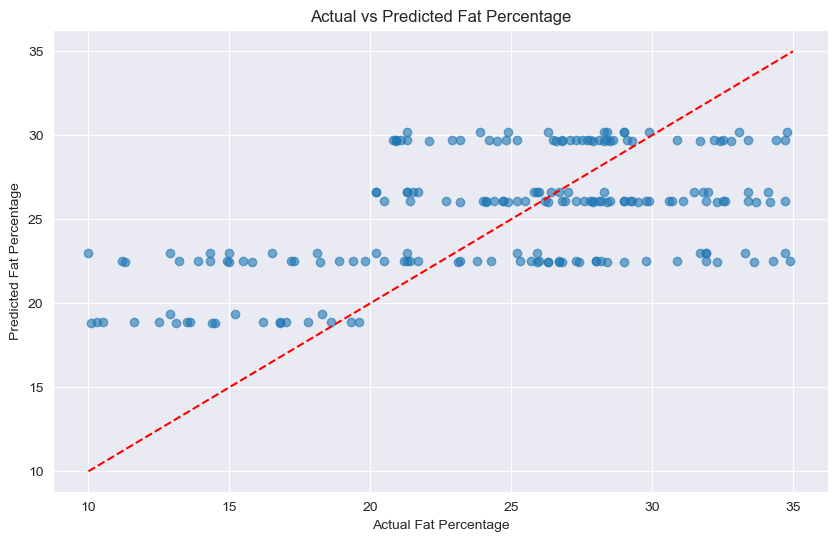

In [28]:
# 예측값과 실제값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 대각선 참고선
plt.xlabel('Actual Fat Percentage')
plt.ylabel('Predicted Fat Percentage')
plt.title('Actual vs Predicted Fat Percentage')
plt.show()


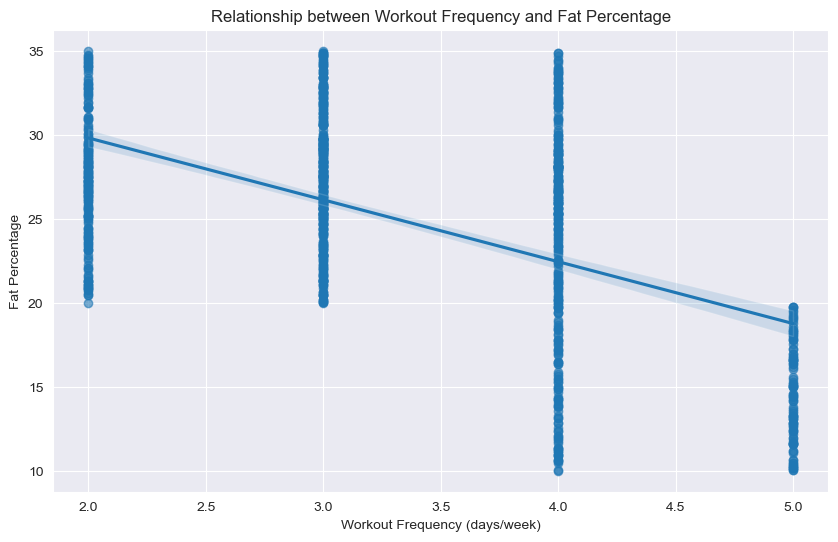

In [36]:
if 'Workout_Type_HIIT' in df.columns:
    df['Workout_Type'] = df[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']].idxmax(axis=1)
    df['Workout_Type'] = df['Workout_Type'].str.replace('Workout_Type_', '')  # 더미 변수로부터 라벨 정리

# 1. 운동 빈도와 체지방 비율의 관계 - 산점도 및 회귀선
plt.figure(figsize=(10, 6))
sns.regplot(x='Workout_Frequency (days/week)', y='Fat_Percentage', data=df, scatter_kws={'alpha':0.6})
plt.title('Relationship between Workout Frequency and Fat Percentage')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Fat Percentage')
plt.show()





/var/folders/ms/g90h_ctd2wgb8rqc0c4b2p280000gn/T/ipykernel_1486/205935928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Workout_Type', y='Fat_Percentage', data=df, palette='Set2')


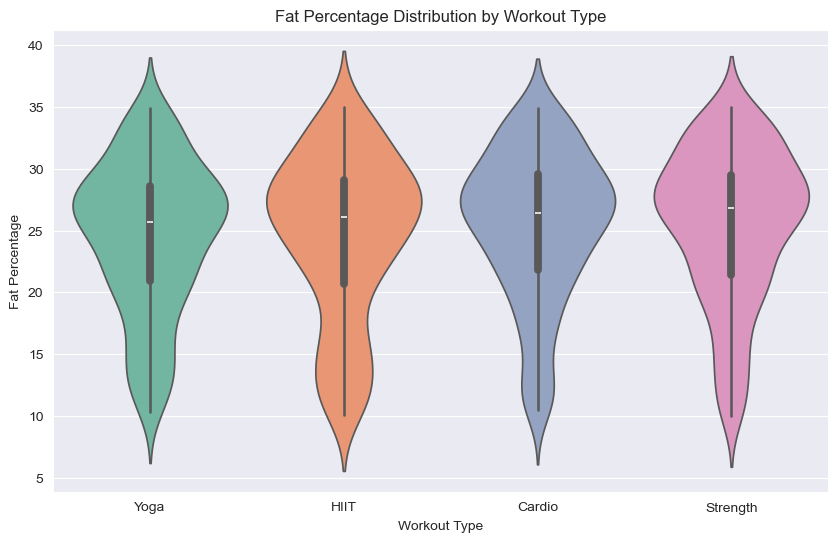

In [37]:
# 2. 운동 유형에 따른 체지방 비율 분포 - 바이올린 플롯
plt.figure(figsize=(10, 6))
sns.violinplot(x='Workout_Type', y='Fat_Percentage', data=df, palette='Set2')
plt.title('Fat Percentage Distribution by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Fat Percentage')
plt.show()